# DataSets

## Sectors Dataset

El orden está en https://www.tradingview.com/markets/indices/quotes-snp/

La referencia de los códigos está en https://www.spglobal.com/marketintelligence/en/documents/112727-gics-mapbook_2018_v3_letter_digitalspreads.pdf

El sector de energía (^SP500-10) en Yahoo Finance se llama ^GSPE

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import bs4 as bs
import requests
import lxml
import missingno

### Análisis de datos faltantes

In [74]:
# TAMBIÉN ESTA EL DE REAL STATE (^SP500-60) PERO ESE NO LO METE REFFINOT
selected_stocks = ['^GSPE', '^SP500-15','^SP500-20','^SP500-25','^SP500-30','^SP500-35','^SP500-40','^SP500-45','^SP500-50','^SP500-55']
sp500_sectors = yf.download(selected_stocks,"1995-01-01","2016-08-31")

[*********************100%***********************]  10 of 10 completed


In [76]:
sp500_sectors['Close'].shape

(5455, 10)

### Análisis de datos faltantes

Mediante la librería *missingno* se grafica el porcentaje de datos no faltantes en cada sub índice. Es posible observar que no se cuenta con datos faltantes. 

<AxesSubplot:>

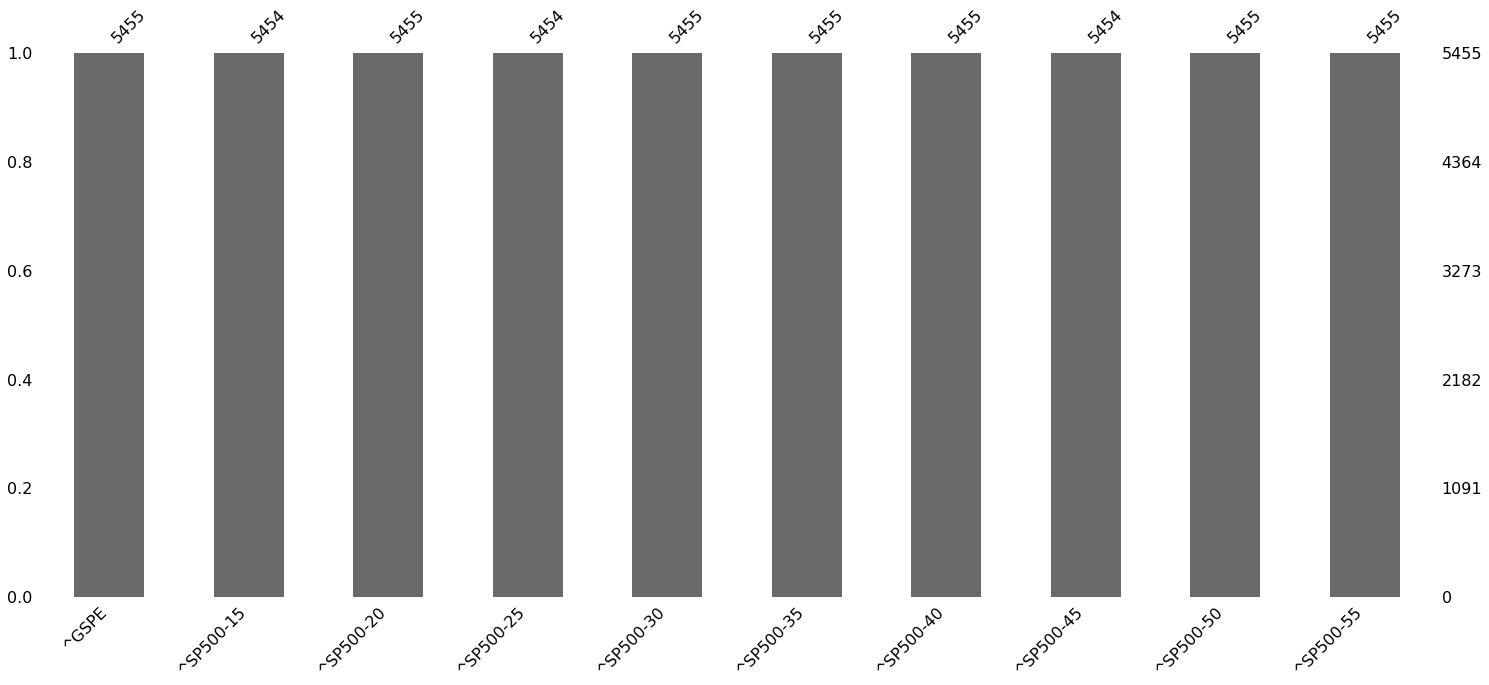

In [77]:
missingno.bar(sp500_sectors['Close'])

In [78]:
sp_500_sectors_close = pd.DataFrame(sp500_sectors['Close'])

In [79]:
sp_500_sectors_close.shape

(5455, 10)

### Persistencia de los datos

In [80]:
sp_500_sectors_close.to_csv('data/sp_500_sectors_close.csv',index = True)

### Obtención de retornos
Se obtienen los retornos porcentuales diarios

In [81]:
sp_500_sectors_returns = np.diff(sp_500_sectors_close, axis = 0)/sp_500_sectors_close.iloc[:-1,:]

In [83]:
sp_500_sectors_returns

,^GSPE,^SP500-15,^SP500-20,^SP500-25,^SP500-30,^SP500-35,^SP500-40,^SP500-45,^SP500-50,^SP500-55
Date,,,,,,,,,,
1995-01-03,0.003888,0.001506,0.000599,0.009734,-0.002794,0.001907,0.009945,0.003332,0.000100,0.006664
1995-01-04,0.000000,0.000401,0.003594,0.003280,-0.009307,0.000401,-0.000591,-0.002013,-0.001799,-0.004644
1995-01-05,-0.002582,0.010022,0.004079,-0.000297,-0.001515,-0.004806,0.002069,0.010588,-0.009211,0.002283
1995-01-06,-0.001394,0.003870,0.001288,-0.000495,0.000000,-0.006539,0.000983,0.007084,0.000707,-0.002080
1995-01-09,-0.003290,0.003361,0.003463,-0.004659,-0.001113,0.002025,0.002750,0.021599,-0.000606,0.000992
...,...,...,...,...,...,...,...,...,...,...
2016-08-23,-0.002694,-0.011588,-0.002842,-0.004454,-0.001604,-0.016074,-0.001236,-0.005358,-0.000347,0.000000
2016-08-24,-0.002916,0.004912,-0.000826,-0.003684,-0.004212,-0.007938,0.002816,0.001241,0.004110,0.000394
2016-08-25,-0.003392,-0.006061,-0.002813,-0.002704,-0.004696,0.003513,0.000617,0.001444,-0.010781,-0.021126


<AxesSubplot:xlabel='Date'>

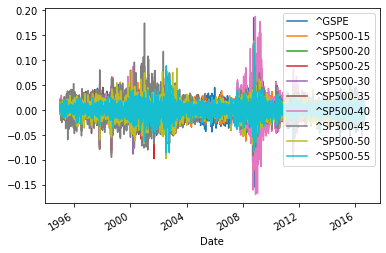

In [84]:
sp_500_sectors_returns.plot()

In [85]:
sp_500_sectors_returns.to_csv('data/sp_500_sectors_returns.csv')

## Multi Asset Dataset

Falta euro stoxx small cap

In [ ]:
multi_asset = ['^SPX', '^RUT', '^STOXX50E', '^FTSE', '^FTSC', ]
multi_asset_data = yf.download(selected_stocks,"1995-01-01","2016-08-31")

## S&P 500

### Descarga de la información
Siguiendo la metodología de Raffinot, primero se obtienen los activos que estaban en el índice en Diciembre del 2021, se obtiene la información histórica y posteriormente nos quedamos únicamente con aquellos activos que cuentan con historia suficiente (approx 3 años hacia atrás, es decir, 2018).

source: https://codingandfun.com/python-scraping-how-to-get-sp-500-companies-from-wikipedia/

Para ver la composición del índice en otros tiempos consultar las versiones en: https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&offset=20200217154235%7C941267549&action=history

A continuación se hace el web scraping de los componentes del S&P 500 a finales del 2021 en la versión de archivo de Wikipedia y mediante Beautifull Soup se obtienen los tickers correspondientes.

In [3]:
resp = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=1062834329')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})


In [4]:
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
tickers = list(map(lambda s: s.strip(), tickers))

En total se tienen 505 empresas, pues algunas de las empresas en el índice tienen más de una familia de acciones. 

In [12]:
len(tickers)

505

La nomenclatura utilizada en Wikipedia no es la misma que la de Yahoo Finance, por lo que hay que cambiar los puntos por guiones.

In [5]:
tickers[tickers.index('BRK.B')] = 'BRK-B'
tickers[tickers.index('BF.B')] = 'BF-B'

In [52]:
sp_500_2021 = yf.download(tickers, "2018-01-01", "2021-12-12")

[*********************100%***********************]  505 of 505 completed


In [62]:
sp_500_2021_close = sp_500_2021['Close']

### Análisis de Datos Faltantes

Mediante el uso de la librería *missingno* se grafica la matriz de datos faltantes, donde es posible observar que hay 8 activos con una cantidad importante de datos faltantes

<AxesSubplot:>

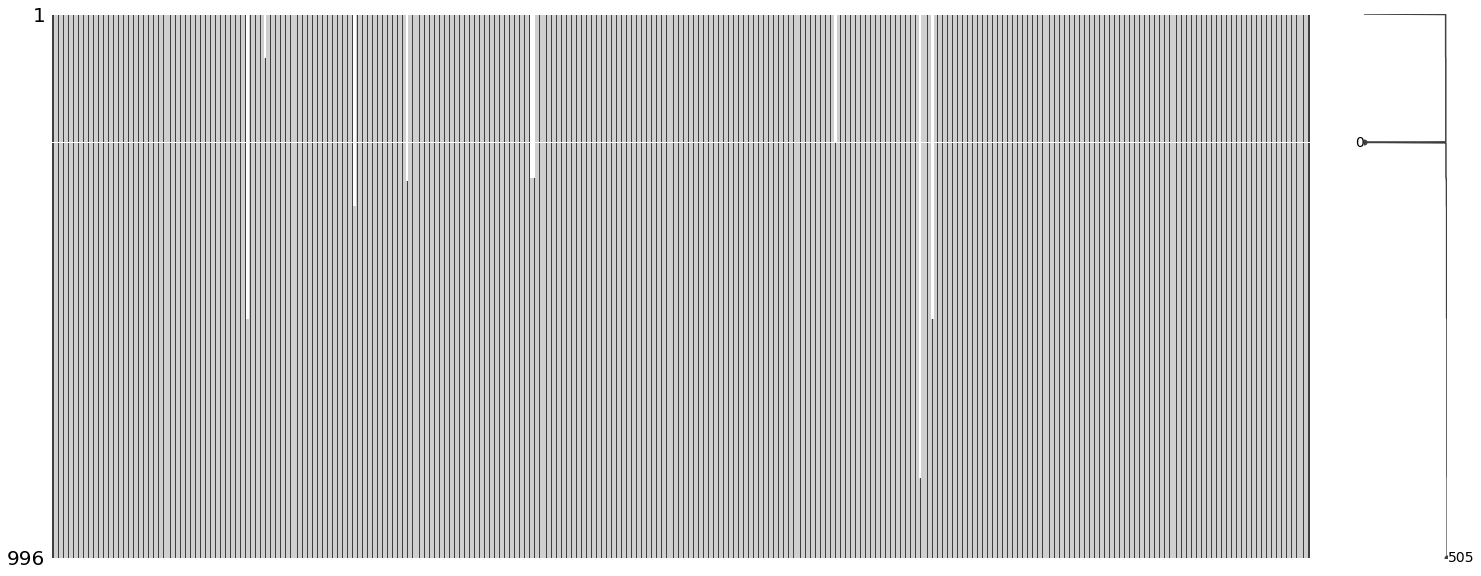

In [63]:
missingno.matrix(sp_500_2021_close)

Hay dos días en las que todas las acciones tienen valores faltantes, el primero de enero del 2018, pues era festivo, y el 05 de diciembre del 2018, pues ese día el NYSE no abrió debido a que fue el funeral del presidente bush (https://heavy.com/news/2018/12/stock-market-closed-national-day-of-mourning/), por lo que quito estos días del conjunto de datos.

In [60]:
sp_500_2021['Close']['ZTS'][pd.isnull(sp_500_2021['Close']['ZTS'])]

Date
2018-01-01   NaN
2018-12-05   NaN
Name: ZTS, dtype: float64

In [61]:
sp_500_2021['Close']['ZBRA'][pd.isnull(sp_500_2021['Close']['ZBRA'])]

Date
2018-01-01   NaN
2018-12-05   NaN
Name: ZBRA, dtype: float64

In [64]:
sp_500_2021_close.shape

(996, 505)

In [65]:
sp_500_2021_close.drop(['2018-01-01 ', '2018-12-05 '], inplace=True)

/tmp/ipykernel_27971/3182956591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_500_2021_close.drop(['2018-01-01 ', '2018-12-05 '], inplace=True)


In [66]:
sp_500_2021_close.shape

(994, 505)

A continuación se muestra una gráfica del porcentaje de valores no faltantes por acción. Es posible observar que solo hay 8 acciones que tienen una cantidad importante de valores faltantes: OTIS, OGN, MRNA,FOXA, FOX, DOW, CTVA, CARR y CDAY. Estas accines se quitarán. 

<AxesSubplot:>

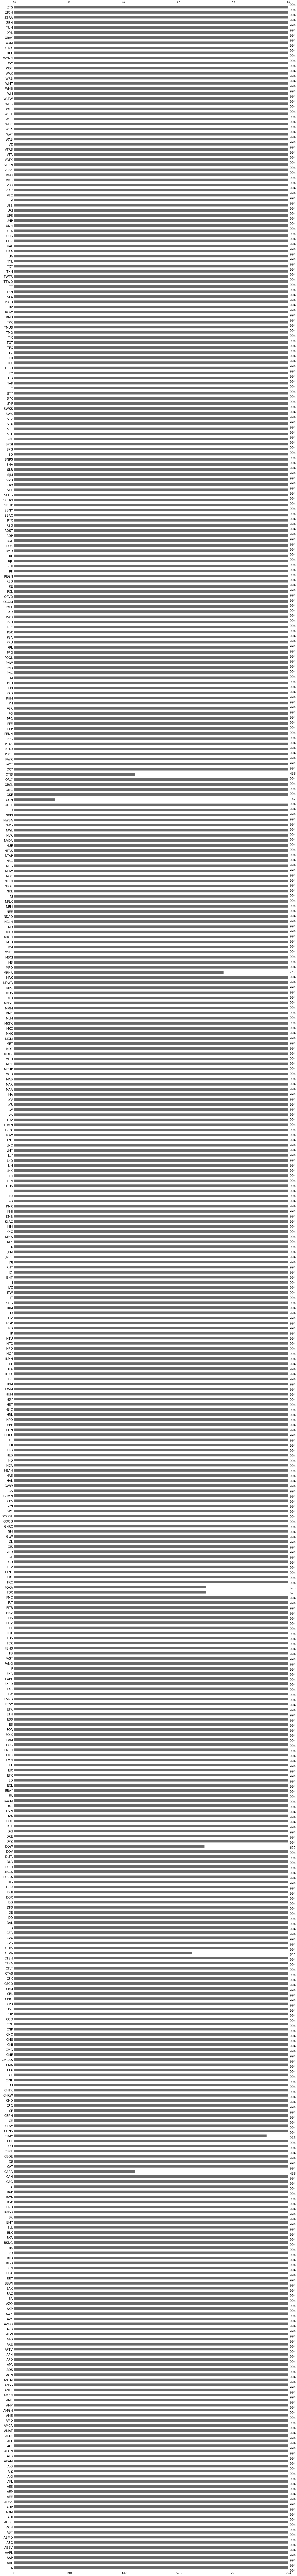

In [67]:
missingno.bar(sp_500_2021_close)

In [68]:
sp_500_2021_close.drop(columns = ['OTIS', 'OGN', 'MRNA', 'FOXA','FOX', 'DOW', 'CTVA', 'CARR', 'CDAY'], inplace=True)

/tmp/ipykernel_27971/3100078423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_500_2021_close.drop(columns = ['OTIS', 'OGN', 'MRNA', 'FOXA','FOX', 'DOW', 'CTVA', 'CARR', 'CDAY'], inplace=True)


In [69]:
sp_500_2021_close.shape

(994, 496)

Se obtiene entonces un conjunto de datos "limpio" con **dimesiones $994 \times 496$**

### Persisitencia de Datos

Se guardan los precios de cierre ya limpios de las acciones con suficiente información histórica y sin valores faltantes en un csv para su posterior análisis.

In [71]:
sp_500_2021_close.to_csv('data/sp_500_2021_close.csv',index = True)

In [6]:
sp_500_2021_close = pd.read_csv('data/sp_500_2021_close.csv', index_col=0)

In [7]:
sp_500_2021_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,192.490005,58.790001,153.839996,177.699997,...,47.810001,67.879997,85.029999,67.139999,68.070000,81.599998,124.059998,103.709999,50.700001,71.769997
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,195.820007,58.919998,154.550003,181.039993,...,47.490002,69.239998,86.699997,66.910004,68.900002,81.529999,124.919998,105.769997,50.639999,72.099998
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,199.250000,58.820000,156.380005,183.220001,...,47.119999,70.489998,86.820000,66.900002,69.360001,82.360001,124.739998,107.860001,50.849998,72.529999
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,202.320007,58.990002,157.669998,185.339996,...,46.790001,74.150002,86.750000,67.839996,69.230003,82.839996,125.980003,109.540001,50.869999,73.360001
2018-01-08,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,207.800003,58.820000,158.929993,185.039993,...,47.139999,74.639999,87.139999,68.300003,69.480003,82.980003,126.220001,110.629997,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,151.470001,17.930000,230.020004,165.320007,121.349998,118.900002,308.149994,132.470001,362.230011,622.039978,...,65.180000,213.410004,61.580002,51.520000,120.699997,128.869995,125.489998,584.219971,63.869999,222.970001
2021-12-07,153.800003,17.889999,234.949997,171.179993,121.510002,119.519997,320.779999,132.419998,371.339996,649.960022,...,66.040001,223.809998,62.270000,52.639999,124.169998,131.300003,128.429993,605.440002,64.440002,225.699997
2021-12-08,156.309998,18.230000,234.029999,175.080002,121.870003,120.849998,324.410004,132.369995,374.529999,653.099976,...,67.110001,224.750000,62.450001,53.189999,124.150002,131.740005,128.960007,605.390015,63.360001,229.619995


### Obtención de los retornos

In [8]:
sp_500_2021_returns = np.diff(sp_500_2021_close, axis = 0)/sp_500_2021_close.iloc[:-1,:]

In [9]:
sp_500_2021_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.017300,0.002211,0.004615,0.018796,...,-0.006693,0.020035,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-03,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,0.017516,-0.001697,0.011841,0.012042,...,-0.007791,0.018053,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-04,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.015408,0.002890,0.008249,0.011571,...,-0.007003,0.051922,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-05,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,0.027086,-0.002882,0.007991,-0.001619,...,0.007480,0.006608,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996
2018-01-08,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.009432,0.001700,0.003335,0.008971,...,-0.011667,0.002679,-0.004246,-0.041728,0.000288,-0.002651,-0.016083,0.030643,0.023509,0.011719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,0.014331,0.078821,0.013929,0.021503,0.021035,0.018328,0.025014,0.016888,0.002241,0.008937,...,0.000153,-0.016816,0.011332,0.015773,0.022102,0.032364,0.035225,-0.006918,0.031659,-0.001612
2021-12-06,0.015383,-0.002231,0.021433,0.035446,0.001319,0.005214,0.040987,-0.000377,0.025150,0.044885,...,0.013194,0.048732,0.011205,0.021739,0.028749,0.018856,0.023428,0.036322,0.008924,0.012244
2021-12-07,0.016320,0.019005,-0.003916,0.022783,0.002963,0.011128,0.011316,-0.000378,0.008591,0.004831,...,0.016202,0.004200,0.002891,0.010448,-0.000161,0.003351,0.004127,-0.000083,-0.016760,0.017368


## S&P 500 desde el 2012 hasta el 2021

### Descarga de información

In [15]:
sp_500_2021_big = yf.download(tickers, "2012-01-01", "2021-12-12")

[*********************100%***********************]  505 of 505 completed


In [16]:
sp_500_2021_big_close = sp_500_2021_big['Close']

Al ser un dataset grande, guardo el conjunto original de datos

In [52]:
sp_500_2021_big_close.to_csv('data/sp_500_2021_big_close_original.csv',index = True)

Originalmente se tienen 2507 días y 505 activos

In [25]:
sp_500_2021_big_close.shape

(2507, 505)

## Análisis de datos faltantes

Hay 4 fechas en donde todas las series de tiempo tienen valores faltantes

In [28]:
sp_500_2021_big_close['A'][pd.isnull(sp_500_2021_big_close['A'])]

Date
2012-10-29   NaN
2016-01-18   NaN
2017-02-20   NaN
2018-12-05   NaN
Name: A, dtype: float64

In [29]:
sp_500_2021_big_close['NTRS'][pd.isnull(sp_500_2021_big_close['A'])]

Date
2012-10-29   NaN
2016-01-18   NaN
2017-02-20   NaN
2018-12-05   NaN
Name: NTRS, dtype: float64

Se quitan esos días para todos los valores

In [30]:
sp_500_2021_big_close.shape

(2507, 505)

In [31]:
sp_500_2021_big_close.drop(['2012-10-29', '2016-01-18', '2017-02-20','2018-12-05'], inplace=True)

/tmp/ipykernel_4820/1634245148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_500_2021_big_close.drop(['2012-10-29', '2016-01-18', '2017-02-20','2018-12-05'], inplace=True)


In [32]:
sp_500_2021_big_close.shape

(2503, 505)

Si se quitan series con relativamente muchos valores faltantes, se quedan 459 series de tiempo, lo cual sigue siendo un buen número

In [33]:
sum(sp_500_2021_big_close.isna().sum().sort_values()>4)

46

In [45]:
activos_val_faltantes = list(sp_500_2021_big_close.isna().sum().sort_values().tail(46).index)
activos_val_faltantes

['EPAM',
 'ENPH',
 'PSX',
 'AMCR',
 'FB',
 'NOW',
 'FANG',
 'ABBV',
 'NCLH',
 'ZTS',
 'IQV',
 'NWSA',
 'NWS',
 'CDW',
 'TWTR',
 'ALLE',
 'HLT',
 'PAYC',
 'ANET',
 'INFO',
 'CTLT',
 'SYF',
 'CZR',
 'CFG',
 'KEYS',
 'QRVO',
 'SEDG',
 'ETSY',
 'WRK',
 'KHC',
 'PYPL',
 'HPE',
 'UA',
 'FTV',
 'HWM',
 'LW',
 'IR',
 'CDAY',
 'MRNA',
 'FOXA',
 'FOX',
 'DOW',
 'CTVA',
 'OTIS',
 'CARR',
 'OGN']

A continuación se quitan los activos con valores faltantes

In [46]:
sp_500_2021_big_close.shape

(2503, 505)

In [47]:
sp_500_2021_big_close.drop(columns = activos_val_faltantes, inplace=True)

/tmp/ipykernel_4820/3885309515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_500_2021_big_close.drop(columns = activos_val_faltantes, inplace=True)


In [48]:
sp_500_2021_big_close.shape

(2503, 459)

En el siguiente diagrama se puede observar que ya no se tienen datos faltantes en el resto de los activos que se conservan

<AxesSubplot:>

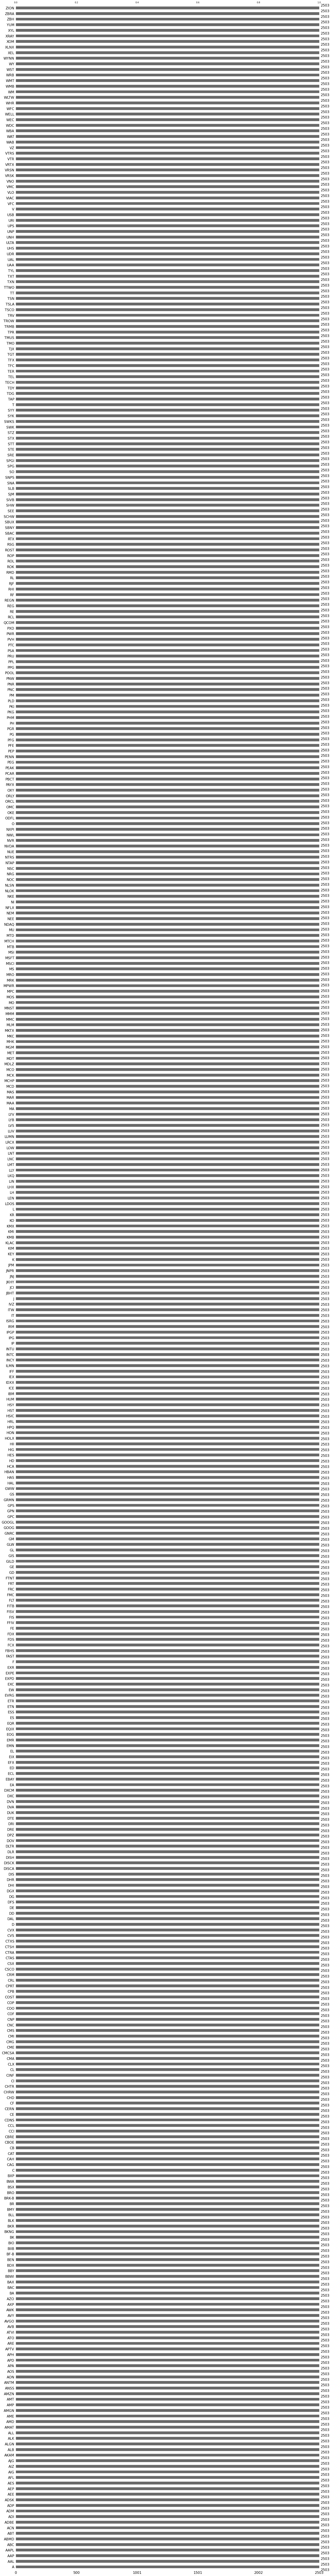

In [49]:
missingno.bar(sp_500_2021_big_close)

### Persistencia de los datos

Por último, se guardan los precios de cierre ya limpios. Se obtiene entonces información de 459 activos y de 2503 días. 

In [51]:
sp_500_2021_big_close.to_csv('data/sp_500_2021_big_close.csv',index = True)

### Calculo de los retornos

Se crean y guardan los retornos asociados a los precios de cierre.

In [53]:
sp_500_2021_big_close = np.diff(sp_500_2021_big_close, axis = 0)/sp_500_2021_big_close.iloc[:-1,:]

In [55]:
sp_500_2021_big_close.to_csv('data/sp_500_2021_big_returns.csv', index = True)

# Mercado europeo

En esta seccioń se FTSE100, DAX30, CAC40, IBEX35, SMI, FTSE MIB, PSI20 y AEX, según lo descrito en el paper que menciona:


*For the european stocks, the set of stocks is constructed with companies that have belonged continuously to the national indices of the UK (FTSE100), Germany (DAX30), France (CAC40), Spain (IBEX35), Switzerland (SMI), Italy (FTSE MIB), Portugal (PSI20), and Holland (AEX). This set comprises 240 stocks, corresponding to big and stable European companies, sampled every day since 2010–2019.*

## FTSE 100

In [4]:
resp = requests.get('https://en.wikipedia.org/wiki/FTSE_100_Index')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find(id="constituents")




In [10]:
tickers_ftse = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[1].text
    ticker = ticker + ".L"
    tickers_ftse.append(ticker)

In [11]:
ftse_100_original = yf.download(tickers_ftse, "2012-01-01", "2021-12-12")

[*********************100%***********************]  100 of 100 completed


In [12]:
ftse_100_original_close = ftse_100_original['Close']
ftse_100_original_close.head(20)

,AAF.L,AAL.L,ABDN.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AVST.L,...,STAN.L,STJ.L,SVT.L,TSCO.L,TW.L,ULVR.L,UU.L,VOD.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,2485.492188,287.047485,1115.0,880.0,230.199997,1305.0,NaN,311.899994,NaN,...,1383.914429,332.600006,1520.0,520.916382,37.369999,2189.0,611.5,188.456100,682.0,1372.878052
2012-01-04,NaN,2460.109619,286.069702,1105.0,877.5,223.300003,1269.0,NaN,309.000000,NaN,...,1372.492798,329.000000,1537.0,513.633118,37.000000,2156.0,620.5,187.674103,679.0,1356.554810
2012-01-05,NaN,2443.685791,282.018890,1113.0,866.0,217.899994,1263.0,NaN,303.500000,NaN,...,1365.830200,320.100006,1532.0,498.939789,36.930000,2170.0,618.5,184.858994,669.0,1345.386230
2012-01-06,NaN,2457.621094,280.622101,1119.0,844.5,220.699997,1270.0,NaN,301.500000,NaN,...,1352.505005,329.500000,1534.0,495.139801,37.369999,2123.0,613.0,187.152802,690.0,1365.145996
2012-01-09,NaN,2427.261719,277.828491,1116.0,825.5,225.000000,1234.0,NaN,299.000000,NaN,...,1330.137817,333.899994,1528.0,494.569794,38.099998,2135.0,612.0,184.650497,701.0,1372.019043
2012-01-10,NaN,2506.893066,284.533203,1132.0,843.5,223.800003,1296.0,NaN,307.000000,NaN,...,1363.450684,337.899994,1539.0,493.999786,38.669998,2151.0,614.0,186.370804,724.5,1413.256958
2012-01-11,NaN,2515.354004,284.952301,1130.0,844.5,222.100006,1282.0,NaN,315.299988,NaN,...,1363.926636,339.500000,1529.0,487.666412,38.750000,2084.0,609.5,186.944305,716.5,1399.510864
2012-01-12,NaN,2543.224854,288.025299,1138.0,871.5,221.000000,1307.0,NaN,324.899994,NaN,...,1377.251831,339.399994,1541.0,409.703094,39.540001,2085.0,611.0,187.152802,732.5,1407.243042
2012-01-13,NaN,2558.653320,285.650696,1128.0,879.0,220.800003,1299.0,NaN,323.200012,NaN,...,1395.335938,335.899994,1542.0,401.279785,41.119999,2055.0,610.0,182.460999,731.0,1398.651855


In [19]:
ftse_100_original_close.shape

(2515, 100)

Hay 8 activos con un número significativo de datos faltantes. En el resto de los activos con datos faltantes, se imputará (observar el mejor método de imputación)

In [24]:
pd.isnull(ftse_100_original_close).sum().sort_values().tail(9)

GLEN.L       5
CCH.L      332
RMG.L      448
BME.L      615
AUTO.L     811
PSH.L     1311
AVST.L    1605
AAF.L     1891
MNG.L     1971
dtype: int64

In [25]:
faltantes_ftse = list(ftse_100_original_close.isna().sum().sort_values().tail(8).index)
faltantes_ftse

['CCH.L', 'RMG.L', 'BME.L', 'AUTO.L', 'PSH.L', 'AVST.L', 'AAF.L', 'MNG.L']

In [26]:
ftse_100_original_close.drop(columns = faltantes_ftse, inplace=True)
ftse_100_original_close.shape

/tmp/ipykernel_90455/1603460440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftse_100_original_close.drop(columns = faltantes_ftse, inplace=True)


(2515, 92)

Se guardan los datos originales pero con los 8 activos sin suficiente infomación histórica disponible

In [37]:
ftse_100_original_close.to_csv('data/ftse_100_original_close.csv',index = True)

In [36]:
ftse_100_original_close['GLEN.L'][pd.isnull(ftse_100_original_close['GLEN.L'])]

Date
2021-02-03   NaN
2021-03-17   NaN
2021-03-19   NaN
2021-08-11   NaN
2021-11-17   NaN
Name: GLEN.L, dtype: float64

Obtener el valor anterior al dato faltante

In [18]:
ftse_100_original_close['GLEN.L']['2021-02-02']

246.8000030517578

Se imputa el data set y es posible observar que el dato fue imputado con el dato inmediato anterior (https://www.projectpro.io/recipes/deal-with-missing-values-in-timeseries-in-python)

In [17]:
ftse_100_original_close.ffill()['GLEN.L']['2021-02-03']

246.8000030517578

Se guarda el dataset imputado

In [19]:
ftse_100_clean_close = ftse_100_original_close.ffill()

In [20]:
pd.isnull(ftse_100_clean_close).sum().sort_values().tail(9)

FLTR.L    0
FERG.L    0
EXPN.L    0
EVR.L     0
ENT.L     0
ECM.L     0
DPH.L     0
GSK.L     0
WTB.L     0
dtype: int64

In [21]:
ftse_100_clean_close.to_csv('data/ftse_100_clean_close.csv',index = True)

Se obtienen los retornos asociados a estos precios de cierre.

In [50]:
ftse_100_returns= np.diff(ftse_100_original_close, axis = 0)/ftse_100_original_close.iloc[:-1,:]
ftse_100_returns.head(10)

,AAL.L,ABDN.L,ABF.L,ADM.L,AHT.L,ANTO.L,AV.L,AVV.L,AZN.L,BA.L,...,STAN.L,STJ.L,SVT.L,TSCO.L,TW.L,ULVR.L,UU.L,VOD.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,-0.010212,-0.003406,-0.008969,-0.002841,-0.029974,-0.027586,-0.009298,0.000671,-0.005082,-0.028145,...,-0.008253,-0.010824,0.011184,-0.013982,-0.009901,-0.015075,0.014718,-0.004149,-0.004399,-0.011890
2012-01-04,-0.006676,-0.014160,0.007240,-0.013105,-0.024183,-0.004728,-0.017799,-0.027498,-0.008239,0.001396,...,-0.004854,-0.027052,-0.003253,-0.028607,-0.001892,0.006494,-0.003223,-0.015000,-0.014728,-0.008233
2012-01-05,0.005703,-0.004953,0.005391,-0.024827,0.012850,0.005542,-0.006590,0.008965,0.010965,0.002787,...,-0.009756,0.029366,0.001305,-0.007616,0.011914,-0.021659,-0.008892,0.012408,0.031390,0.014687
2012-01-06,-0.012353,-0.009955,-0.002681,-0.022499,0.019483,-0.028346,-0.008292,0.010937,-0.011011,0.004865,...,-0.016538,0.013354,-0.003911,-0.001151,0.019534,0.005652,-0.001631,-0.013370,0.015942,0.005035
2012-01-09,0.032807,0.024133,0.014337,0.021805,-0.005333,0.050243,0.026756,-0.008790,0.005151,0.051521,...,0.025045,0.011980,0.007199,-0.001153,0.014961,0.007494,0.003268,0.009317,0.033524,0.030056
2012-01-10,0.003375,0.001473,-0.001767,0.001186,-0.007596,-0.010802,0.027036,0.025921,0.008101,0.012825,...,0.000349,0.004735,-0.006498,-0.012821,0.002069,-0.031148,-0.007329,0.003077,-0.011042,-0.009727
2012-01-11,0.011080,0.010784,0.007080,0.031972,-0.004953,0.019501,0.030447,0.020612,0.006888,-0.018507,...,0.009770,-0.000295,0.007848,-0.159870,0.020387,0.000480,0.002461,0.001115,0.022331,0.005525
2012-01-12,0.006066,-0.008244,-0.008787,0.008606,-0.000905,-0.006121,-0.005232,-0.010423,-0.007492,0.002316,...,0.013131,-0.010312,0.000649,-0.020560,0.039959,-0.014388,-0.001637,-0.025069,-0.002048,-0.006105
2012-01-13,0.009531,0.002934,0.002660,-0.001138,0.001359,0.001540,0.004022,0.010533,0.007713,0.006271,...,0.001364,0.015183,0.004540,-0.014047,-0.008998,0.010706,0.000820,0.004857,0.009576,-0.007371


In [51]:
ftse_100_returns.to_csv('data/ftse_100_returns.csv', index = True)

## DAX 30

In [23]:
resp = requests.get('https://en.wikipedia.org/wiki/DAX')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find(id="constituents")

In [29]:
yf.download("ADS.DE", "2012-01-01", "2021-12-12")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,49.509998,51.490002,49.509998,51.419998,43.405800,631605
2012-01-03,51.560001,52.410000,51.560001,52.130001,44.005146,748556
2012-01-04,52.060001,52.299999,51.709999,51.959999,43.861637,645026
2012-01-05,52.070000,52.439999,51.619999,52.080002,43.962940,587340
2012-01-06,52.080002,52.270000,50.959999,51.740002,43.675934,761413
...,...,...,...,...,...,...
2021-12-06,251.399994,257.549988,250.600006,255.250000,255.250000,584859
2021-12-07,255.250000,255.250000,255.250000,255.250000,255.250000,0
2021-12-08,266.049988,267.000000,262.299988,263.000000,263.000000,405021


In [33]:
tickers_dax = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[3].text
    tickers_dax.append(ticker)

La acción de mercedez benz no tiene información histórica disponible, por lo que se quita del conjunto original

In [37]:
dax_30_original = yf.download(tickers_dax, "2012-01-01", "2021-12-12")

[*********************100%***********************]  30 of 30 completed

1 Failed download:
- MBG.DE: No data found for this date range, symbol may be delisted


In [39]:
dax_30_original_close = dax_30_original['Close']
dax_30_original_close.head(20)

,1COV.DE,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,DB1.DE,DBK.DE,DHER.DE,...,LIN.DE,MBG.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VNA.DE,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29 00:00:00,45.630001,281.200012,164.880005,52.340000,53.509998,62.000000,92.139999,151.199997,7.074,99.080002,...,202.300003,NaN,125.199997,141.949997,218.100006,32.000000,134.160004,108.639999,58.320000,138.740005
2020-09-30 00:00:00,42.349998,276.100006,163.619995,51.980000,53.310001,61.990002,92.480003,149.800003,7.190,98.120003,...,201.899994,NaN,124.550003,142.000000,216.600006,31.980000,132.759995,107.879997,58.580002,137.399994
2020-10-01 00:00:00,42.450001,278.899994,162.179993,51.369999,46.340000,62.660000,95.300003,148.199997,7.100,98.800003,...,201.399994,NaN,125.949997,144.300003,215.600006,32.869999,133.740005,106.660004,59.340000,134.300003
2020-10-02 00:00:00,43.389999,276.899994,162.800003,52.029999,44.935001,62.360001,96.260002,148.350006,7.196,98.500000,...,199.649994,NaN,127.000000,141.750000,216.199997,33.490002,132.759995,105.879997,59.060001,132.000000
2020-10-05 00:00:00,43.680000,273.500000,166.520004,53.340000,46.770000,64.029999,98.320000,149.000000,7.360,98.279999,...,199.500000,NaN,128.449997,145.300003,221.899994,33.000000,132.399994,107.320000,59.299999,134.699997
2020-10-06 00:00:00,43.669998,276.200012,169.020004,53.950001,46.299999,64.849998,99.580002,150.500000,7.780,99.000000,...,200.399994,NaN,128.350006,152.050003,221.800003,32.820000,131.460007,108.919998,58.820000,137.479996
2020-10-07 00:00:00,44.939999,277.100006,166.639999,55.680000,45.299999,65.739998,101.849998,145.800003,7.800,98.519997,...,201.899994,NaN,129.300003,151.500000,217.100006,33.240002,130.380005,109.239998,58.520000,138.919998
2020-10-08 00:00:00,45.220001,277.299988,167.679993,57.200001,46.314999,65.720001,102.250000,148.699997,7.928,95.300003,...,202.399994,NaN,130.350006,156.750000,220.000000,33.910000,132.339996,110.839996,58.700001,137.979996
2020-10-09 00:00:00,44.779999,282.500000,168.139999,55.040001,46.730000,64.699997,100.500000,147.850006,7.843,98.800003,...,202.699997,NaN,131.000000,156.250000,218.500000,33.610001,133.059998,111.559998,58.740002,137.660004


In [40]:
dax_30_original_close.shape

(2520, 30)

Hay adicionalmente 4 acciones más que tienen un número considerativo de valores faltantes

In [41]:
pd.isnull(dax_30_original_close).sum().sort_values().tail(9)

BAYN.DE       0
BAS.DE        0
ALV.DE        0
ADS.DE        0
VNA.DE      386
1COV.DE     950
DHER.DE    1392
ENR.DE     2213
MBG.DE     2520
dtype: int64

In [42]:
faltantes_dax = list(dax_30_original_close.isna().sum().sort_values().tail(5).index)
faltantes_dax

['VNA.DE', '1COV.DE', 'DHER.DE', 'ENR.DE', 'MBG.DE']

Se quitan las 5 acciones con valores faltantes

In [43]:
dax_30_original_close.drop(columns = faltantes_dax, inplace=True)
dax_30_original_close.shape

/tmp/ipykernel_1973/471293819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dax_30_original_close.drop(columns = faltantes_dax, inplace=True)


(2520, 25)

In [44]:
dax_30_original_close.shape

(2520, 25)

No es necesario imputar datos en este caso, y como se muestra a continuación, ya se tiene entonces el conjunto de datos limpio

In [45]:
pd.isnull(dax_30_original_close).sum().sort_values().tail(9)

DBK.DE     0
DB1.DE     0
CON.DE     0
BMW.DE     0
BAYN.DE    0
BAS.DE     0
ALV.DE     0
EOAN.DE    0
VOW3.DE    0
dtype: int64

In [47]:
dax_30_original_close.to_csv('data/dax_30_clean_close.csv',index = True)

Se obtienen a continuación los rendimientos asociados a estos precios de cierre

In [48]:
dax_30_returns= np.diff(dax_30_original_close, axis = 0)/dax_30_original_close.iloc[:-1,:]
dax_30_returns.head(10)

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,DB1.DE,DBK.DE,DPW.DE,DTE.DE,...,HEN3.DE,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29 00:00:00,-0.018137,-0.007642,-0.006878,-0.003738,-0.000161,0.003690,-0.009259,0.016398,-0.014691,0.001051,...,-0.000224,-0.002894,-0.001977,-0.005192,0.000352,-0.006878,-0.000625,-0.010435,-0.006996,-0.009658
2020-09-30 00:00:00,0.010141,-0.008801,-0.011735,-0.130745,0.010808,0.030493,-0.010681,-0.012517,0.009512,0.012596,...,0.005822,0.075886,-0.002476,0.011240,0.016197,-0.004617,0.027830,0.007382,-0.011309,-0.022562
2020-10-01 00:00:00,-0.007171,0.003823,0.012848,-0.030319,-0.004788,0.010073,0.001012,0.013521,-0.001019,0.002764,...,0.000445,-0.020235,-0.008689,0.008337,-0.017672,0.002783,0.018862,-0.007328,-0.007313,-0.017126
2020-10-02 00:00:00,-0.012279,0.022850,0.025178,0.040837,0.026780,0.021400,0.004381,0.022790,0.007392,0.012405,...,0.012461,0.011408,-0.000751,0.011417,0.025044,0.026364,-0.014631,-0.002712,0.013600,0.020455
2020-10-05 00:00:00,0.009872,0.015013,0.011436,-0.010049,0.012806,0.012815,0.010067,0.057065,0.003795,0.000681,...,-0.000220,0.001556,0.004511,-0.000778,0.046456,-0.000451,-0.005455,-0.007100,0.014909,0.020638
2020-10-06 00:00:00,0.003258,-0.014081,0.032067,-0.021598,0.013724,0.022796,-0.031229,0.002571,0.039072,-0.015986,...,0.005935,0.021359,0.007485,0.007402,-0.003617,-0.021190,0.012797,-0.008215,0.002938,0.010474
2020-10-07 00:00:00,0.000722,0.006241,0.027299,0.022406,-0.000304,0.003927,0.019890,0.016410,-0.006065,-0.001037,...,0.005900,0.020342,0.002476,0.008121,0.034653,0.013358,0.020156,0.015033,0.014647,-0.006767
2020-10-08 00:00:00,0.018752,0.002743,-0.037762,0.008960,-0.015520,-0.017115,-0.005716,-0.010721,0.007566,-0.003806,...,0.013904,0.025154,0.001482,0.004987,-0.003190,-0.006818,-0.008847,0.005441,0.006496,-0.002319
2020-10-09 00:00:00,0.013451,0.010111,-0.005814,-0.007918,0.006028,-0.006169,0.002029,0.002168,0.000485,0.006599,...,-0.009856,0.020901,0.008880,0.000000,-0.020800,0.012815,0.012199,0.009920,0.007888,0.012640


In [49]:
dax_30_returns.to_csv('data/dax_30_returns.csv', index = True)

## CAC 40

In [52]:
resp = requests.get('https://en.wikipedia.org/wiki/CAC_40')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find(id="constituents")

In [56]:
tickers_cac = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[3].text
    tickers_cac.append(ticker)
tickers_cac = list(map(lambda s: s.strip(), tickers_cac))

In [58]:
len(tickers_cac)

40

In [86]:
cac_40_original = yf.download(tickers_cac, "2012-01-01", "2021-12-12")

[*********************100%***********************]  40 of 40 completed


In [100]:
cac_40_original_close = cac_40_original['Close']
cac_40_original_close.tail(20)

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SGO.PA,STLA.PA,STM.PA,SU.PA,TEP.PA,TTE.PA,URW.AS,VIE.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-15,12.782,151.979996,114.040001,33.040001,57.639999,61.220001,16.250000,214.500000,25.860001,94.629997,...,60.180000,17.954000,44.915001,156.240005,357.100006,43.639999,65.900002,29.980000,11.285,50.400002
2021-11-16,12.704,151.059998,115.000000,33.959999,56.599998,60.230000,15.925000,214.800003,25.555000,93.769997,...,60.090000,18.076000,45.150002,155.880005,356.700012,43.860001,67.699997,29.809999,11.105,51.299999
2021-11-17,12.766,151.679993,114.440002,33.240002,56.750000,60.180000,16.045000,215.600006,25.565001,92.879997,...,61.110001,17.952000,45.669998,158.619995,358.200012,43.540001,64.559998,29.969999,11.095,49.709999
2021-11-18,12.650,152.000000,113.260002,32.880001,56.630001,59.520000,15.805000,215.199997,25.430000,91.300003,...,61.599998,17.958000,45.400002,159.660004,357.100006,43.070000,64.540001,29.920000,11.070,50.660000
2021-11-19,12.478,153.500000,109.400002,33.180000,56.189999,57.720001,15.870000,215.800003,25.165001,88.650002,...,60.919998,17.510000,45.810001,161.419998,365.000000,41.895000,62.330002,29.020000,11.050,50.130001
2021-11-22,12.722,153.419998,108.779999,33.330002,56.330002,58.639999,16.070000,211.399994,25.395000,89.529999,...,60.529999,17.482000,45.709999,162.100006,359.799988,42.395000,63.099998,28.969999,11.265,48.599998
2021-11-23,12.626,151.440002,110.260002,34.160000,56.779999,58.889999,16.040001,205.399994,25.495001,90.580002,...,60.240002,17.000000,43.900002,159.899994,347.600006,42.884998,63.849998,28.879999,11.200,48.680000
2021-11-24,12.666,151.679993,111.459999,33.740002,56.169998,58.540001,15.790000,203.399994,25.540001,91.599998,...,59.990002,16.792000,43.695000,156.160004,351.700012,43.115002,64.400002,29.139999,11.400,48.689999
2021-11-25,12.620,151.360001,112.260002,33.779999,56.090000,58.730000,15.685000,205.699997,25.469999,91.769997,...,60.410000,16.712000,43.514999,156.720001,354.600006,43.084999,66.339996,29.250000,11.440,49.625000


In [101]:
cac_40_original_close.shape

(2545, 40)

Únicamente hay dos activos que tienen un número significativo de valores faltantes, y el resto siempre tienen dos valores faltantes

In [102]:
pd.isnull(cac_40_original_close).sum().sort_values().tail(40)

ACA.PA        2
MT.AS         2
OR.PA         2
ORA.PA        2
PUB.PA        2
RI.PA         2
RMS.PA        2
RNO.PA        2
ML.PA         2
SAF.PA        2
SGO.PA        2
STM.PA        2
SU.PA         2
TEP.PA        2
TTE.PA        2
URW.AS        2
VIE.PA        2
SAN.PA        2
VIV.PA        2
MC.PA         2
KER.PA        2
AI.PA         2
AIR.PA        2
ALO.PA        2
BN.PA         2
BNP.PA        2
CA.PA         2
CAP.PA        2
LR.PA         2
CS.PA         2
DSY.PA        2
EL.PA         2
EN.PA         2
ENGI.PA       2
ERF.PA        2
GLE.PA        2
HO.PA         2
DG.PA         2
WLN.PA      635
STLA.PA    2078
dtype: int64

In [103]:
faltantes_cac = list(cac_40_original_close.isna().sum().sort_values().tail(2).index)
faltantes_cac

['WLN.PA', 'STLA.PA']

In [104]:
cac_40_original_close.drop(columns = faltantes_cac, inplace=True)
cac_40_original_close.shape

/tmp/ipykernel_1973/2191975576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cac_40_original_close.drop(columns = faltantes_cac, inplace=True)


(2545, 38)

Adicionalmente se quitan los dos valores faltantes que hay para todo el dataset

In [105]:
cac_40_original_close.dropna( inplace=True)
cac_40_original_close.shape

/tmp/ipykernel_1973/3667233867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cac_40_original_close.dropna( inplace=True)


(2541, 38)

Como se puede observar, ya no es necesario realizar la imputación de datos y se puede guardar el dataset

In [106]:
pd.isnull(cac_40_original_close).sum().sort_values().tail(10)

CS.PA      0
DSY.PA     0
EL.PA      0
EN.PA      0
ENGI.PA    0
ERF.PA     0
GLE.PA     0
HO.PA      0
DG.PA      0
VIV.PA     0
dtype: int64

In [107]:
cac_40_original_close.to_csv('data/cac_40_clean_close.csv',index = True)

A continuación se obtienen los rendimientos diarios asociados a los precios de cierre.

In [108]:
cac_40_returns= np.diff(cac_40_original_close, axis = 0)/cac_40_original_close.iloc[:-1,:]
cac_40_returns.head(10)

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAF.PA,SAN.PA,SGO.PA,STM.PA,SU.PA,TEP.PA,TTE.PA,URW.AS,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.000000,0.003500,0.000000,0.014318,0.011067,0.001438,0.010210,0.006979,0.014382,0.008853,...,-0.008085,-0.002264,0.023640,0.051669,0.040905,0.006845,0.011125,0.003266,-0.011080,-0.005997
2012-01-03,-0.030002,-0.006361,0.002653,-0.013707,-0.024202,-0.021861,-0.039060,-0.006337,-0.017013,-0.005898,...,-0.016302,-0.018851,-0.022287,-0.031338,-0.027277,-0.004533,-0.007665,-0.011935,-0.039498,-0.023556
2012-01-04,-0.052093,-0.017553,0.013230,-0.035677,-0.003190,-0.053834,-0.043775,-0.033679,-0.049038,-0.014182,...,0.009594,-0.012631,-0.019656,-0.013567,0.010100,-0.031303,-0.006852,-0.015739,-0.032520,-0.018241
2012-01-05,0.013003,-0.002627,-0.005022,-0.020650,-0.003407,-0.018793,-0.012485,0.018148,-0.009100,-0.009542,...,0.008855,0.013514,-0.017186,0.026238,-0.001882,0.011163,0.003261,-0.013760,-0.010108,-0.008091
2012-01-06,-0.020828,-0.001264,0.004038,-0.004612,0.014814,-0.019680,-0.000301,0.004659,-0.026123,0.003261,...,-0.001284,-0.008178,-0.000171,-0.006804,0.006364,-0.012202,-0.000750,-0.003771,-0.017717,-0.013897
2012-01-09,0.018303,0.033551,0.006636,0.023610,-0.001837,0.060584,0.014755,0.019960,0.075545,0.034126,...,0.008360,0.017207,0.059671,0.050446,0.043682,0.048235,0.012012,0.038607,0.026804,-0.002451
2012-01-10,0.008016,-0.002348,0.005593,0.019832,-0.010329,0.014027,-0.006528,-0.012453,0.013639,0.013714,...,0.020408,-0.004934,0.017476,-0.027273,0.010323,0.001684,-0.013971,0.009475,0.001708,-0.016585
2012-01-11,0.017831,-0.003991,-0.005364,-0.000634,-0.017051,0.033667,-0.006571,-0.013211,0.006728,-0.002396,...,0.005625,-0.010448,0.006520,0.017676,-0.001555,0.014846,-0.020690,-0.001444,0.026547,-0.001249
2012-01-12,-0.003788,0.006061,0.004594,0.022843,-0.010829,0.025153,0.008118,0.020284,0.002387,-0.009888,...,-0.001243,-0.004653,0.011376,-0.008185,0.013904,-0.013801,-0.000896,-0.010846,-0.007117,-0.007505


In [109]:
cac_40_returns.shape

(2540, 38)

In [110]:
cac_40_returns.to_csv('data/cac_40_returns.csv', index = True)

## IBEX 35

In [116]:
resp = requests.get('https://en.wikipedia.org/wiki/IBEX_35')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find(id="components")

In [122]:
tickers_ibex = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    ticker = ticker.strip()
    ticker = ticker + ".MC"
    tickers_ibex.append(ticker)

In [124]:
len(tickers_ibex)

35

In [125]:
ibex_35_original = yf.download(tickers_ibex, "2012-01-01", "2021-12-12")

[*********************100%***********************]  35 of 35 completed


In [126]:
ibex_35_original_close = ibex_35_original['Close']
ibex_35_original_close.tail(20)

,ACS.MC,ACX.MC,AENA.MC,ALM.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,...,NTGY.MC,PHM.MC,REE.MC,REP.MC,SAB.MC,SAN.MC,SGRE.MC,SLR.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-15,23.459999,10.880,148.449997,11.30,63.520000,161.500000,5.8650,4.972,2.513,25.940001,...,22.660000,62.959999,18.055000,10.934,0.6870,3.2115,21.950001,16.184999,3.9085,58.299999
2021-11-16,23.120001,10.760,145.899994,11.17,61.959999,162.000000,5.7990,4.914,2.500,26.780001,...,22.580000,61.360001,17.975000,10.982,0.6530,3.2090,21.990000,16.875000,3.9000,58.500000
2021-11-17,22.850000,10.700,143.250000,11.27,61.720001,160.899994,5.7520,4.770,2.492,27.299999,...,22.950001,61.180000,18.035000,10.858,0.6442,3.2000,21.840000,17.170000,3.9160,58.500000
2021-11-18,22.450001,10.755,141.699997,10.90,63.200001,158.399994,5.4350,4.699,2.467,26.420000,...,22.590000,59.080002,18.000000,10.660,0.6342,3.1380,21.530001,16.575001,3.9455,57.849998
2021-11-19,21.730000,10.450,136.600006,10.65,60.200001,158.800003,5.4030,4.557,2.374,26.299999,...,22.920000,60.119999,18.080000,10.374,0.6090,3.0585,21.910000,16.600000,3.9675,57.900002
2021-11-22,21.879999,10.660,136.000000,10.32,59.320000,160.399994,5.4240,4.602,2.396,26.639999,...,23.780001,57.560001,18.219999,10.536,0.6258,3.1020,21.440001,16.635000,4.2210,58.250000
2021-11-23,22.270000,10.780,136.899994,10.63,59.799999,159.399994,5.2930,4.583,2.406,26.639999,...,24.000000,56.459999,18.469999,10.606,0.6362,3.0635,21.340000,16.230000,4.0365,57.500000
2021-11-24,22.309999,10.735,139.600006,10.77,60.060001,160.899994,5.1900,4.573,2.403,26.200001,...,23.920000,56.980000,18.465000,10.526,0.6314,3.0320,21.490000,16.385000,4.0440,57.400002
2021-11-25,22.400000,10.615,140.800003,10.93,61.340000,163.000000,5.2300,4.547,2.405,26.100000,...,24.440001,57.599998,18.455000,10.478,0.6272,3.0555,22.580000,17.025000,4.0250,57.349998


In [127]:
ibex_35_original_close.shape

(2544, 35)

Solo hay tres activos que no cuentan con toda la información necesaria

In [129]:
pd.isnull(ibex_35_original_close).sum().sort_values().tail(10)

CABK.MC      0
COL.MC       0
ELE.MC       0
ENG.MC       0
FDR.MC       0
CIE.MC       0
VIS.MC       0
MRL.MC     635
AENA.MC    794
CLNX.MC    852
dtype: int64

In [130]:
faltantes_ibex = list(ibex_35_original_close.isna().sum().sort_values().tail(3).index)
faltantes_ibex

['MRL.MC', 'AENA.MC', 'CLNX.MC']

In [131]:
ibex_35_original_close.drop(columns = faltantes_ibex, inplace=True)
ibex_35_original_close.shape

/tmp/ipykernel_1973/2640529581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibex_35_original_close.drop(columns = faltantes_ibex, inplace=True)


(2544, 32)

No es necesario imputar datos y es posible guardar ya el dataset

In [132]:
pd.isnull(ibex_35_original_close).sum().sort_values().tail(10)

CIE.MC     0
CABK.MC    0
BKT.MC     0
BBVA.MC    0
ANA.MC     0
AMS.MC     0
ALM.MC     0
ACX.MC     0
TEF.MC     0
VIS.MC     0
dtype: int64

In [133]:
ibex_35_original_close.to_csv('data/ibex_35_clean_close.csv',index = True)

Procedo a calcular los rendimientos

In [134]:
ibex_35_returns= np.diff(ibex_35_original_close, axis = 0)/ibex_35_original_close.iloc[:-1,:]
ibex_35_returns.head(10)

,ACS.MC,ACX.MC,ALM.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,COL.MC,...,NTGY.MC,PHM.MC,REE.MC,REP.MC,SAB.MC,SAN.MC,SGRE.MC,SLR.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.015054,0.022886,-0.033028,0.021497,-0.016730,0.005887,-0.006198,-0.014194,-0.003546,-0.028274,...,0.010697,0.005814,-0.002985,-0.004362,0.000000,0.009386,-0.000298,-0.030568,0.003660,0.021005
2012-01-03,-0.019280,-0.001945,-0.009488,-0.006235,-0.029701,-0.029407,-0.002701,0.013089,0.000890,-0.029862,...,-0.018613,0.095376,-0.006887,0.005633,-0.024226,-0.038525,-0.068379,0.004505,-0.021153,-0.007083
2012-01-04,-0.040830,0.001949,-0.005747,-0.016863,-0.013536,-0.050347,-0.051282,-0.031266,-0.004444,0.008682,...,-0.016363,0.013193,-0.018996,-0.029046,-0.057241,-0.045078,-0.012821,-0.040359,-0.022355,-0.019022
2012-01-05,0.001802,0.009728,0.017341,0.011169,-0.009044,-0.011270,0.001978,0.001867,0.002679,-0.004695,...,-0.004159,-0.002604,0.001844,-0.003205,-0.012436,-0.014288,-0.023701,-0.028037,-0.005716,0.005886
2012-01-06,-0.008543,-0.011079,-0.005682,0.011440,0.021243,-0.027131,0.015349,0.009052,-0.002671,-0.025157,...,-0.025057,-0.018277,0.005829,0.016720,-0.004815,-0.000917,-0.008979,0.033654,-0.003066,0.009983
2012-01-09,0.020635,0.010716,0.000000,0.005850,-0.027427,0.037129,0.028944,-0.005541,0.014286,-0.008871,...,0.008567,0.021277,0.022571,-0.007379,0.000000,0.054178,0.029195,0.000000,0.027297,-0.003408
2012-01-10,0.011775,-0.002410,0.020952,-0.011245,-0.022972,-0.000159,-0.002519,-0.008756,0.000880,-0.061025,...,-0.013514,0.018229,-0.001790,-0.057137,-0.002977,-0.003310,-0.002282,-0.023256,0.001871,-0.006498
2012-01-11,0.000220,0.005314,0.007463,0.001569,0.020918,0.007479,0.018308,0.003747,-0.000880,-0.001733,...,0.003523,0.000000,0.035410,-0.007434,0.006719,-0.006992,0.015686,0.019048,0.001121,0.005852
2012-01-12,0.005269,-0.000481,0.005555,0.020752,0.002541,0.010741,0.005372,0.024000,0.002641,-0.020833,...,-0.001560,0.033248,-0.004329,-0.006355,-0.021135,0.012146,-0.009974,-0.009346,-0.003731,-0.011294


In [135]:
ibex_35_returns.shape

(2543, 32)

In [136]:
ibex_35_returns.to_csv('data/ibex_35_returns.csv', index = True)